In [ ]:
%%shell

cd /content

# Install pycocotools
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
python setup.py build_ext install

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 27.47 MiB/s, done.
Resolving deltas: 100% (576/576), done.
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/u

In [ ]:
! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip

--2020-08-15 08:20:06--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.96.212
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.96.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  91.9MB/s    in 2.6s    

2020-08-15 08:20:09 (91.9 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:


%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)



In [ ]:
dataDir='/content'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.59s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('First 20 COCO categories: \n{}'.format(' '.join(nms[:20])))
print(f"Overall {len(nms)} categories\n")

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))
print(f"Overall {len(nms)} supercategories")

First 20 COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow
Overall 80 categories

COCO supercategories: 
indoor furniture vehicle food sports kitchen outdoor electronic appliance accessory animal person
Overall 12 supercategories


In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['dog']);
imgIds = coco.getImgIds(catIds=catIds );
print("Type of imgIds: ", type(imgIds), "\nimgIds: ", imgIds[:10], "\nSize: ", len(imgIds))
#imgIds = coco.getImgIds(imgIds = [539143])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(f"\nType of img: {type(img)}")
print(f"img keys: {img.keys()}")

Type of imgIds:  <class 'list'> 
imgIds:  [329219, 404484, 205834, 546829, 554002, 366611, 182805, 395801, 427034, 61471] 
Size:  177

Type of img: <class 'dict'>
img keys: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])


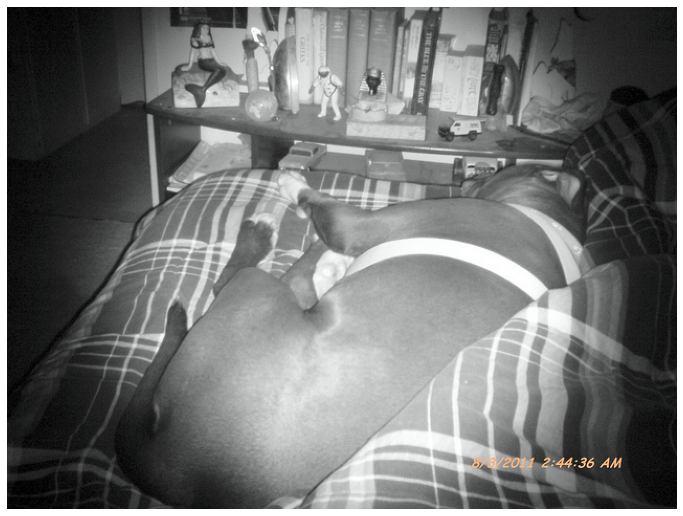

In [ ]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

# Let's look at some pictures

In [ ]:
b_catIds = coco.getCatIds(catNms=['dog']);
b_imgIds = coco.getImgIds(catIds=b_catIds );
b_images = coco.loadImgs(ids=b_imgIds)
raw_images = [io.imread(b_images[i]['coco_url']) for i in range(10)]

In [ ]:
print(f"Type of b_images: {type(b_images)}")
print(f"Type of b_images[0]: {type(b_images[0])}")
print(f"Keys of b_images[0]: {b_images[0].keys()}")
print(f"Type of raw_images: {type(raw_images)}")
print(f"Type of raw_images[0]: {type(raw_images[0])}")
print(f"Shape of raw_images[0]: {raw_images[0].shape}")

Type of b_images: <class 'list'>
Type of b_images[0]: <class 'dict'>
Keys of b_images[0]: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
Type of raw_images: <class 'list'>
Type of raw_images[0]: <class 'numpy.ndarray'>
Shape of raw_images[0]: (427, 640, 3)


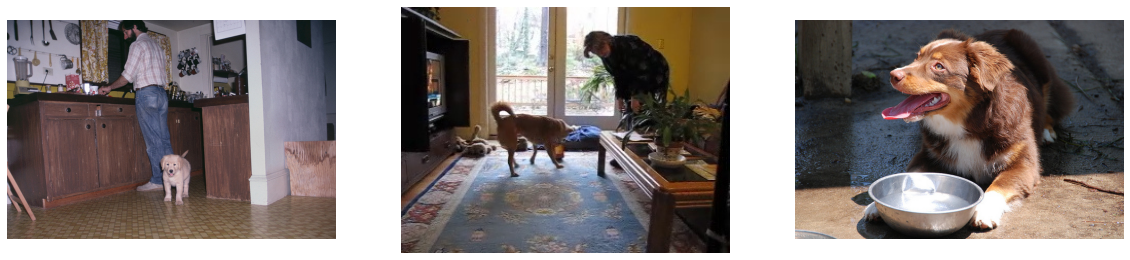

In [ ]:
# fig = plt.figure(figsize=(12, 12))
start = 0
pylab.rcParams['figure.figsize'] = (20, 20)
for j in range(3):
  I = raw_images[start + j]
  plt.subplot(1, 3, j + 1)
  plt.axis('off')
  plt.imshow(I)

# Loading Resnet18

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models import resnet18,resnet50
model = resnet50(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# load labels
! wget "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt"
# ! wget "https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt"

with open("imagenet1000_clsidx_to_labels.txt", 'r') as f:
    imagenet_labels = f.readlines()

coco_labels = {}
for cat in cats:
  coco_labels[cat['id']] = cat['name']  

--2020-08-15 08:20:30--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsidx_to_labels.txt’

imagenet1000_clsidx 100%[===================>]  29.85K  --.-KB/s    in 0.01s   

2020-08-15 08:20:30 (2.04 MB/s) - ‘imagenet1000_clsidx_to_labels.txt’ saved [30564/30564]

--2020-08-15 08:20:31--  https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.

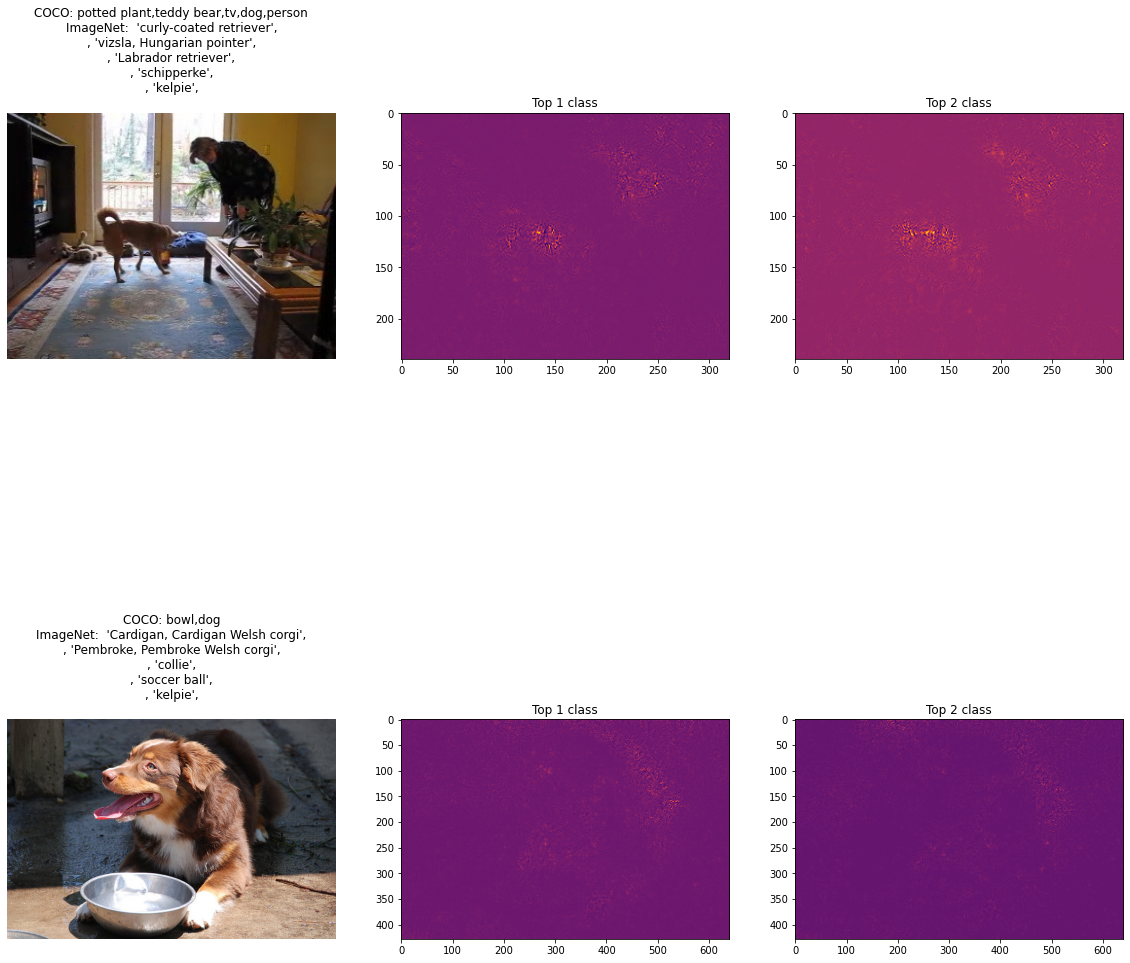

In [ ]:
from torchvision import models, datasets, transforms
from PIL import Image
from matplotlib.pyplot import imshow

def get_coco_description(img_id):
  #catIds = coco.getCatIds(catNms=['cat','dog']);
  #annIds = coco.getAnnIds(imgIds=coco_im['id'], catIds=catIds, iscrowd=None)
  annIds = coco.getAnnIds(imgIds=img_id)
  anns = coco.loadAnns(annIds)
  #print(anns)
  #coco.showAnns(anns)
  description = set()
  for a in anns:
    label = coco_labels[a['category_id']]
    description.add(label)
  return ",".join(list(description))


transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])


#print(coco_labels)
start = 1
pylab.rcParams['figure.figsize'] = (20.0, 20.0)
for j in range(2):
  coco_im = b_images[start + j]
  I = io.imread(coco_im['coco_url'])
  plt.subplot(2, 3, j * 3 + 1)
  plt.axis('off')
  
  pil_image = Image.fromarray(I)
  coco_descr = "COCO: " + get_coco_description(coco_im['id'])
  
  
  tensor_image = transform(pil_image)
  tensor_image =tensor_image.unsqueeze(0)
  tensor_image.requires_grad = True
  output = model(tensor_image)

  # Display Top 5 class names
  imnet_descr_labels = []
  top_class_indexes = np.argsort(output[0].detach().numpy())[-5:]
  for i in np.flip(top_class_indexes):
    imnet_descr_labels.append(imagenet_labels[i].split(":")[1])
  imagenet_descr = "ImageNet: " + ",".join(imnet_descr_labels)
  title = coco_descr + "\n" +imagenet_descr
  plt.title(title)
  imshow(pil_image)

  plt.subplot(2, 3, j * 3 + 2)
  plt.title("Top 1 class")
  current_score = output[0][top_class_indexes[0]]
  current_score.backward()
  image_grad = tensor_image.grad[0].numpy().max(axis=0)
  plt.imshow(image_grad, cmap='inferno')

  plt.subplot(2, 3, j * 3 + 3)
  plt.title("Top 2 class")
  tensor_image = transform(pil_image)
  tensor_image =tensor_image.unsqueeze(0)
  tensor_image.requires_grad = True
  output = model(tensor_image)
  # tensor_image.grad.data.zero_()
  current_score = output[0][top_class_indexes[1]]
  current_score.backward()
  image_grad = tensor_image.grad[0].numpy().max(axis=0)
  plt.imshow(image_grad, cmap='inferno')
  

# Indices to labels map

In [ ]:
# import json

In [ ]:
# map_path = '/content/drive/My Drive/Course Work/Algo 2014/ind_to_img.json'
# with open(map_path, 'r') as file:
#   ind_to_labels = json.load(file)

In [ ]:
# list(ind_to_labels.keys())[:5]

['0', '1', '2', '3', '4']

In [ ]:
# def labels_to_ind(cat):
#   for ind, category in ind_to_labels.items():
#     if cat in category:
#       return ind

In [ ]:
# labels_to_ind('dog'), labels_to_ind('cat')

('153', '30')

# Backprop

In [ ]:
# index = 2
# H, W, C = raw_images[5].shape
# new_image = raw_images[5].reshape((C, H, W))
# # plt.imshow(new_image.reshape((H, W, C)))
# print(f"Type: {type(new_image)}")
# print(f"Shape: {new_image.shape}")
# print(f"Min: {new_image.min()}; Max: {new_image.max()}")
# new_image = new_image / 255.
# print(f"Min: {new_image.min()}; Max: {new_image.max()}")

# new_tensor = torch.tensor(new_image, requires_grad=True)
# print(f"new_tensor type: {type(new_tensor)}")
# print(f"new_tensor min: {new_tensor.min()}")
# print(f"new_tensor max: {new_tensor.max()}")
# print(f"new_tensor mean: {new_tensor.mean()}")
# print(f"new_tensor mean: {new_tensor.std()}")

# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# new_tensor = torch.reshape(normalize(new_tensor), (1, C, H, W))
# print(f"new_tensor min: {new_tensor.min()}")
# print(f"new_tensor max: {new_tensor.max()}")
# print(f"new_tensor mean: {new_tensor.mean()}")
# print(f"new_tensor mean: {new_tensor.std()}")


# new_output = model(new_tensor.float())
# print(f"new_output type: {type(new_output)}")
# print(f"new_output[0] type: {type(new_output[0])}")
# print(f"new_output[0] shape: {new_output[0].shape}")

# sorted_tensor, sorted_indices = torch.sort(new_output, descending=True)
# print(f"Type: {type(sorted_tensor)}")
# print(f"Type of indices: {type(sorted_indices)}")
# print(sorted_indices[0][:10])

# for el in sorted_indices[0][:10].numpy():
#   print(ind_to_labels[str(el)])

# # current_score = new_output[0][3]
# # print(f"Current score: {current_score}")

# # current_score.backward()
# # print(f"Input derivative: {new_tensor.grad}")
# # print(f"Input derivative shape: {new_tensor.grad.shape}")
# # print(f"Input derivative max: {new_tensor.grad.max()}")

Type: <class 'numpy.ndarray'>
Shape: (3, 478, 640)
Min: 0; Max: 255
Min: 0.0; Max: 1.0
new_tensor type: <class 'torch.Tensor'>
new_tensor min: 0.0
new_tensor max: 1.0
new_tensor mean: 0.45012893712232266
new_tensor mean: 0.22167392218469983
new_tensor min: -2.0151554071410223
new_tensor max: 2.6399999999999997
new_tensor mean: 0.0026081517137627338
new_tensor mean: 0.934165403127354
new_output type: <class 'torch.Tensor'>
new_output[0] type: <class 'torch.Tensor'>
new_output[0] shape: torch.Size([1000])
Type: <class 'torch.Tensor'>
Type of indices: <class 'torch.Tensor'>
tensor([463, 731, 600, 412, 898, 899, 700, 618, 733, 428])
bucket, pail
plunger, plumber's helper
hook, claw
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
water bottle
water jug
paper towel
ladle
pole
barrow, garden cart, lawn cart, wheelbarrow
